### Assignment

#### Data Description
- covid data of daily cummulative cases of India as reported from January 2020 to 8th August 2020
- Source: https://www.kaggle.com/sudalairajkumar/covid19-in-india

#### Conduct below Insight investigation
1. Find which state has highest mean of cummulative confirmed cases since reported from Jan 2020
<br>- Plot line graph plotting means of top 10 States having highest daily confirmed cases
2. Which state has highest Death Rate for the month of June, July & Aug
<br> - Plot bar graph of Death Rates for the top 5 states
3. Explore Trend in Confirmed Cases for the state of Maharashtra
<br> - Plot line graph with x axis as Date column and y axis as daily confirmed cases. - such a graph is also called
<br> as Time Series Plot

#### Below key steps to be adopted to solve above Questions
- Load Data --> Clean data / Data munging --> Grouping of Data by State --> Exploration using plots
- update required code where everywhere '?' is mentioned in the code block

#### Load Packages

In [2]:
import pandas as pd # for cleaning and loading data from csv file
import numpy as np
from matplotlib import pyplot as plt # package for plotting graphs
import datetime
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

#### Load data

In [3]:
df = ?
df.head() # Preview first 5 rows of dataframe

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
# Convert Date column which is a string into datetime object
df["Date"] = pd.to_datetime(df["Date"], format = "%d/%m/%y")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


Explore more about datetime conversion of column in pandas here:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html?highlight=datetime#pandas.to_datetime

#### Cleaning of data
- The dataset consists of cummulative values, aim is to create columns with daily reported deaths and confirmed cases.
- Below method is helper function to create column consisting of daily cases reported from Cummulative freq column

In [5]:
ex = np.unique(df['State/UnionTerritory'])
ex

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadar Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Telangana***', 'Telengana', 'Telengana***', 'Tripura',
       'Unassigned', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

From above unique values of states it is clear that Telangana is represented in multiple ways. We will change each occurrence of Telangna state with standard spelling

In [6]:
def clean_stateName(stateName):
    if stateName == 'Telangana***':
        stateName = 'Telangana'
    elif stateName == 'Telengana':
        stateName = 'Telangana'
    elif stateName == 'Telengana***':
        stateName = 'Telangana'
    
    return stateName

- Apply method is used to apply either user defined or builtin function across every cell of dataframe
- Commonly lambda function is used to apply method across each cell
- A lambda function is a small anonymous function.
- A lambda function can take any number of arguments, but can only have one expression.

In [7]:
df["State/UnionTerritory"] = df["State/UnionTerritory"].apply(lambda x: clean_stateName(x))
np.unique(df["State/UnionTerritory"]) # to identify all unique values in a column of dataframe or array

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadar Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Unassigned', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

Helper function to find daily confirmed cases from cumulative values

In [8]:
def daily_cases(dframe, stateColumn,dateColumn, cummColumn):
    # Sort column containing state and then by date in ascending order
    dframe.sort_values(by = [stateColumn, dateColumn], inplace = True)
    newColName = 'daily_' + cummColumn
    dframe[newColName] = dframe[cummColumn].diff() # diff is pandas method to caclucate difference between consecutive values
#     print(dframe.tail())
    '''
    Below line uses shift method of pandas to compare consecutive state names and if they are not different
    as shown by using ! symbol then create list of boolean, True for if they are different else False
    ''' 
    mask = dframe[stateColumn] != dframe[stateColumn].shift(1)
    dframe[newColName][mask] = np.nan # where value of mask =True the cell value will be replaced by NaN
    dframe[newColName] = dframe[newColName].apply(lambda x: 0 if x < 0 else x) # replace negative values by 0
#     dframe.drop('diffs',axis=1, inplace = True)
    
    return dframe
    

In [9]:
df_new = daily_cases(dframe= df, stateColumn= 'State/UnionTerritory',dateColumn= 'Date', cummColumn= 'Confirmed')

<ipython-input-8-4efcf8e0fcc5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe[newColName][mask] = np.nan # where value of mask =True the cell value will be replaced by NaN


In [10]:
# Preview data 
df_new[df_new["State/UnionTerritory"]=="Maharashtra"].tail(n=5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed
4830,4831,2020-08-04,8:00 AM,Maharashtra,-,-,287030,15842,450196,8968.0
4865,4866,2020-08-05,8:00 AM,Maharashtra,-,-,299356,16142,457956,7760.0
4900,4901,2020-08-06,8:00 AM,Maharashtra,-,-,305521,16476,468265,10309.0
4935,4936,2020-08-07,8:00 AM,Maharashtra,-,-,316375,16792,479779,11514.0
4970,4971,2020-08-08,8:00 AM,Maharashtra,-,-,327281,17092,490262,10483.0


#### Q1. Find which state has highest mean of cummulative confirmed cases since reported from Jan 2020

In [11]:
# Hint : Groupby state names to find their means for confirmed cases
df_group = ?

In [12]:
df_group = df_group.sort_values(ascending= False)[0:10]
df_group

State/UnionTerritory
Maharashtra       3225.440789
Tamil Nadu        1850.798701
Andhra Pradesh    1388.986577
Karnataka         1085.019737
Delhi              897.622642
Uttar Pradesh      722.114650
West Bengal        627.027972
Bihar              512.964029
Gujarat            487.680851
Telangana          487.496855
Name: daily_Confirmed, dtype: float64

In [13]:
df_group.index

Index(['Maharashtra', 'Tamil Nadu', 'Andhra Pradesh', 'Karnataka', 'Delhi',
       'Uttar Pradesh', 'West Bengal', 'Bihar', 'Gujarat', 'Telangana'],
      dtype='object', name='State/UnionTerritory')

Text(0, 0.5, 'Mean of Daily Confirmed Cases')

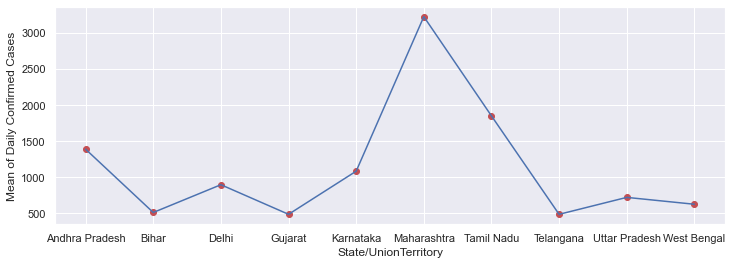

In [14]:
ax = sns.lineplot(x= ? , y= df_group.values) # df_group.values - extract only the values of a column
plt.scatter(x= ? , y= ? , c = 'r')
ax.figure.set_figwidth(12)
ax.figure.set_figheight(4)
ax.set_ylabel("Mean of Daily Confirmed Cases")

#### Q2. Which state has highest Death Rate for the month of June, July & Aug

In [15]:
# Hint - explore how a datetime column of dataframe can be filtered using specific months as a list 
df_months = df_new['Date'].apply(lambda x: x.month in ?) # this will create boolean basis comparison of months from a list

In [16]:
df_final = df_new[df_months] # Filtered dataframe consisting of data from June, July & Aug

In [17]:
df_final.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed
4845,4846,2020-08-04,8:00 AM,West Bengal,-,-,54818,1731,78232,2716.0
4880,4881,2020-08-05,8:00 AM,West Bengal,-,-,56884,1785,80984,2752.0
4915,4916,2020-08-06,8:00 AM,West Bengal,-,-,58962,1846,83800,2816.0
4950,4951,2020-08-07,8:00 AM,West Bengal,-,-,61023,1902,86754,2954.0
4985,4986,2020-08-08,8:00 AM,West Bengal,-,-,63060,1954,89666,2912.0


In [18]:
df_final['death_rate'] = df_final['Deaths'] / df_final['Confirmed'] *100

<ipython-input-18-199836f307be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['death_rate'] = df_final['Deaths'] / df_final['Confirmed'] *100


In [19]:
df_final.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed,death_rate
4845,4846,2020-08-04,8:00 AM,West Bengal,-,-,54818,1731,78232,2716.0,2.212650
4880,4881,2020-08-05,8:00 AM,West Bengal,-,-,56884,1785,80984,2752.0,2.204139
4915,4916,2020-08-06,8:00 AM,West Bengal,-,-,58962,1846,83800,2816.0,2.202864
4950,4951,2020-08-07,8:00 AM,West Bengal,-,-,61023,1902,86754,2954.0,2.192406
4985,4986,2020-08-08,8:00 AM,West Bengal,-,-,63060,1954,89666,2912.0,2.179198


In [20]:
df_groups_deaths = ?

In [21]:
top_10_deathrates = ?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

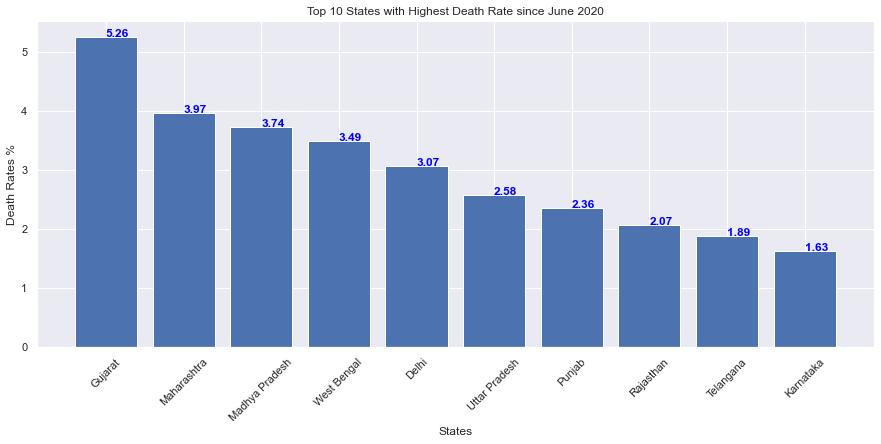

In [22]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.bar(x = ?, height =  ?)
ax.set_xlabel('States')
ax.set_ylabel('Death Rates %')
ax.set_title('Top 10 States with Highest Death Rate since June 2020')
for i, v in enumerate(top_10_deathrates.values):
    ax.text(i, v, s = ("%.2f" % v), color='blue', fontweight='bold', fontsize = 12) # %.2f will print decimals upto 2 places
plt.xticks(rotation=45) # this line will rotate the x axis label in 45 degrees to make it more readable

### Q3. Explore Trend in Confirmed Cases for the state of Maharashtra
- Plot line graph with x axis as Date column and y axis as daily confirmed cases. - such a graph is also called
as Time Series Plot

#### Hint - explore on google or in matplotlib for Time series graph from a dataframe